In [136]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [138]:
# convert csv to dataframe
df=pd.read_csv("ml_data.csv")
df

,Owner No,Model Year,Price,Kms Driven,Mileage,Seats,Fuel Type_Cng,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Lpg,...,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,3,2015,4.00,120000,23.10,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,2018,8.11,32706,17.00,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,2018,5.85,11949,23.84,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,2014,4.62,17794,19.10,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,2015,7.90,60000,23.65,5,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,1,2022,5.10,10000,25.24,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7333,1,2014,1.80,120000,22.74,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7334,3,2011,5.50,50000,11.74,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7335,1,2012,1.40,40000,18.50,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [140]:
# create x and y datas
x=df.drop(columns=["Price"],axis=1)
y=df["Price"]

In [142]:
# scaling the data with standardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [148]:
l=pd.DataFrame(x_scaled)
l

,0,1,2,3,4,5,6,7,8,9,...,445,446,447,448,449,450,451,452,453,454
0,2.564394,-0.379530,1.363566,0.930052,-0.280653,-0.113921,-0.627751,-0.053576,-0.043724,0.655057,...,-0.011675,-0.011675,-0.011675,-0.011675,2.154959,-0.451194,-0.442414,-0.475503,-0.396785,-0.451850
1,0.997656,0.425504,-0.608537,-0.712497,-0.280653,-0.113921,-0.627751,-0.053576,-0.043724,0.655057,...,-0.011675,-0.011675,-0.011675,-0.011675,2.154959,-0.451194,-0.442414,-0.475503,-0.396785,-0.451850
2,-0.569082,0.425504,-1.077468,1.129312,-0.280653,-0.113921,-0.627751,-0.053576,-0.043724,0.655057,...,-0.011675,-0.011675,-0.011675,-0.011675,2.154959,-0.451194,-0.442414,-0.475503,-0.396785,-0.451850
3,-0.569082,-0.647874,-0.945421,-0.147029,-0.280653,-0.113921,-0.627751,-0.053576,-0.043724,0.655057,...,-0.011675,-0.011675,-0.011675,-0.011675,2.154959,-0.451194,-0.442414,-0.475503,-0.396785,-0.451850
4,-0.569082,-0.379530,0.008076,1.078150,-0.280653,-0.113921,1.592987,-0.053576,-0.043724,-1.526584,...,-0.011675,-0.011675,-0.011675,-0.011675,2.154959,-0.451194,-0.442414,-0.475503,-0.396785,-0.451850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,-0.569082,1.498881,-1.121499,1.506290,-0.280653,-0.113921,-0.627751,-0.053576,-0.043724,0.655057,...,-0.011675,-0.011675,-0.011675,-0.011675,-0.464046,-0.451194,-0.442414,-0.475503,-0.396785,2.213122
7333,-0.569082,-0.647874,1.363566,0.833114,-0.280653,-0.113921,-0.627751,-0.053576,-0.043724,0.655057,...,-0.011675,-0.011675,-0.011675,-0.011675,-0.464046,-0.451194,-0.442414,-0.475503,-0.396785,2.213122
7334,2.564394,-1.452908,-0.217839,-2.128858,-0.280653,-0.113921,-0.627751,-0.053576,-0.043724,0.655057,...,-0.011675,-0.011675,-0.011675,-0.011675,-0.464046,-0.451194,-0.442414,-0.475503,-0.396785,2.213122
7335,-0.569082,-1.184563,-0.443754,-0.308591,-0.280653,-0.113921,-0.627751,-0.053576,-0.043724,0.655057,...,-0.011675,-0.011675,-0.011675,-0.011675,-0.464046,-0.451194,-0.442414,-0.475503,-0.396785,2.213122


In [9]:
import pickle
with open('standard.pkl','wb') as f:
    pickle.dump(scaler,f)

In [128]:
# function to choose the best algorithm

def best_ML_algorithm(x,y,algorithms):
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

        resultss = []

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)
                MSE_1=mean_squared_error(y_test,y_pred)
                MAE_1=mean_absolute_error(y_test,y_pred)
                RMSE_1=np.sqrt(mean_squared_error(y_test,y_pred))
                r_squr_1=r2_score(y_test,y_pred)
                resultss.append({"model": type(model).__name__,
                                          "MAE": MAE_1,
                                          "MSE": MSE_1,
                                          "RMSE": RMSE_1,
                                           "R2": r_squr_1 })
                print(f"Trainscore: {model.score(x_train, y_train)}")
                print(f"Testscore: {model.score(x_test, y_test)}")
                # Plot Actual vs Predicted Prices
                plt.figure(figsize=(10, 6))
                sns.scatterplot(x=y_test, y=y_pred)
                plt.xlabel('Actual Prices')
                plt.ylabel('Predicted Prices')
                plt.title(f'{type(model).__name__}: Actual vs Predicted Prices')
                plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Add reference line
                plt.show()
        results_df = pd.DataFrame(resultss)
        
        return results_df

Trainscore: 0.8850889856782399
Testscore: -5.567520170165592e+27


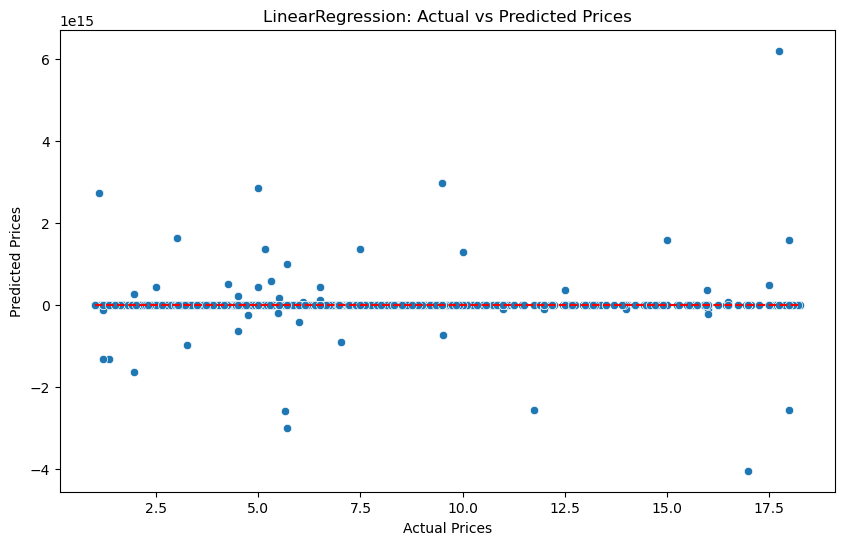

Trainscore: 0.999678341088635
Testscore: 0.7800336518591174


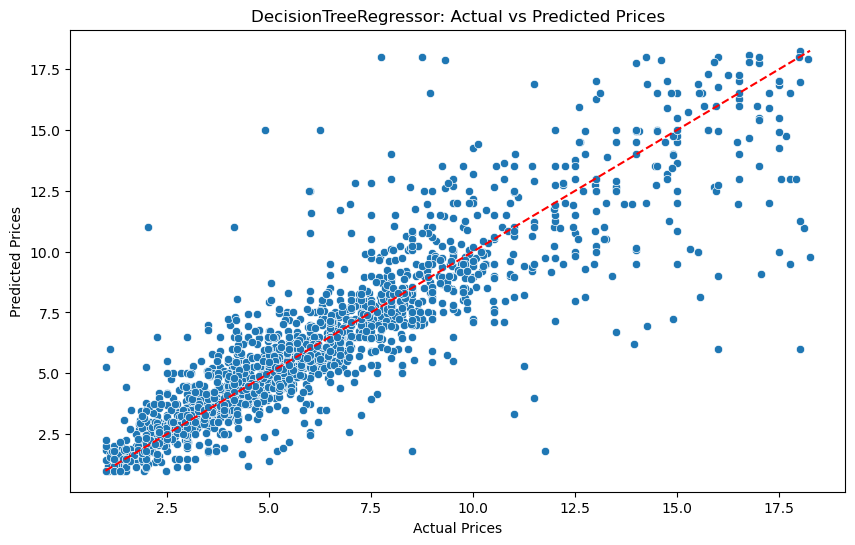

Trainscore: 0.9815727422228142
Testscore: 0.8840872291718254


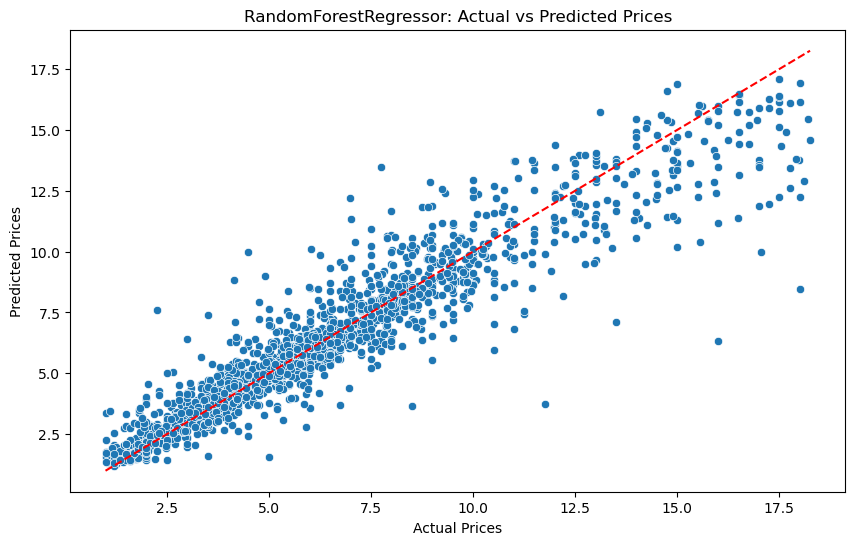

Trainscore: 0.8311293670782198
Testscore: 0.8095502947278874


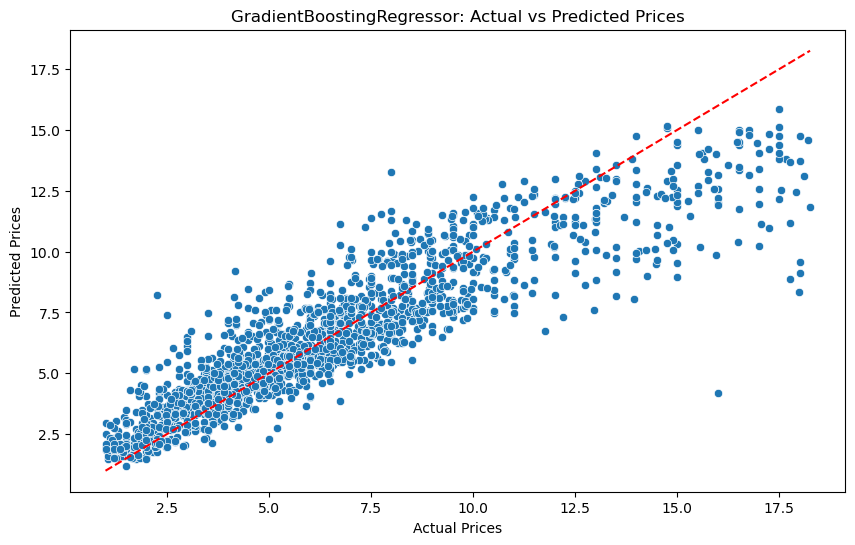

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# using above function try to identify the best algorithm

algorithms = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor,GradientBoostingRegressor]

results_df = best_ML_algorithm(x_scaled,y, algorithms)

In [134]:
# model comparision
results_df

,model,MAE,MSE,RMSE,R2
0,LinearRegression,2.890064e+13,7.265332e+28,2.695428e+14,-5.567520e+27
1,DecisionTreeRegressor,1.053777e+00,2.870450e+00,1.694240e+00,7.800337e-01
2,RandomForestRegressor,7.808407e-01,1.512603e+00,1.229879e+00,8.840872e-01
3,GradientBoostingRegressor,1.108473e+00,2.485272e+00,1.576475e+00,8.095503e-01


**L1 and L2 Regularaization**

In [94]:
# using L2 or ridge to fit and evalutes the model
from sklearn.linear_model import Ridge
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
values=[]
for i in alpha_values:
    ridgeModel = Ridge(alpha=i)
    ridgeModel.fit(X_train,Y_train)
    y_pred=ridgeModel.predict(X_test)
    r_squr=r2_score(Y_test,y_pred)
    values.append(r_squr)


In [96]:
values

[0.8651473867807771,
 0.8651475942802188,
 0.865149745174206,
 0.8651708563730569,
 0.8653480066489209,
 0.8659816698247592,
 0.8662756076292903]

In [51]:
# best alpha values for prediction
best_alpha_ridge = alpha_values[np.argmax(values)]
ridgeModel_1 = Ridge(alpha=best_alpha_ridge)
ridgeModel_1.fit(X_train, Y_train)
y_pred_ridge=ridgeModel_1.predict(X_test)

In [53]:
# model evaluation
MSE_ridge=mean_squared_error(Y_test,y_pred_ridge)
MAE_ridge=mean_absolute_error(Y_test,y_pred_ridge)
RMSE_ridge=np.sqrt(mean_squared_error(Y_test,y_pred_ridge))
r_squr_ridge=r2_score(Y_test,y_pred_ridge)

In [55]:
# create dataframe to view above evaluation metrics
ridge=pd.DataFrame({"model":"RidgeRegressor","MAE":[MSE_ridge],"MSE":[MAE_ridge],"RMSE":[RMSE_ridge],"R2":r_squr_ridge})
ridge

,model,MAE,MSE,RMSE,R2
0,RidgeRegressor,1.745036,0.849443,1.320998,0.866276


In [57]:
# using ridge to fit and evalutes the model
from sklearn.linear_model import Lasso
alpha_values_L = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
values_L=[]
for i in alpha_values_L:
    LassoModel = Lasso(alpha=i)
    LassoModel.fit(X_train,Y_train)
    y_pred=LassoModel.predict(X_test)
    r_squr=r2_score(Y_test,y_pred)
    values_L.append(r_squr)
print(values_L)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.249e+03, tolerance: 7.473e+00

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.357e+01, tolerance: 7.473e+00



[0.8715604319725254, 0.867959589792874, 0.8696714015178857, 0.8008231504965466, 0.38823966449860003, -0.0002585819357934227, -0.0002585819357934227]


In [59]:
# best alpha values for prediction
best_alpha_lasso = alpha_values_L[np.argmax(values_L)]
LassoModel_1 = Lasso(alpha=best_alpha_lasso)
LassoModel_1.fit(X_train, Y_train)
y_pred_lasso=LassoModel_1.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.249e+03, tolerance: 7.473e+00



In [61]:
# model evaluation
MSE_lasso=mean_squared_error(Y_test,y_pred_lasso)
MAE_lasso=mean_absolute_error(Y_test,y_pred_lasso)
RMSE_lasso=np.sqrt(mean_squared_error(Y_test,y_pred_lasso))
r_squr_lasso=r2_score(Y_test,y_pred_lasso)

In [63]:
# create dataframe to view above evaluation metrics
lasso=pd.DataFrame({"model":"LassoRegressor","MAE":[MSE_lasso],"MSE":[MAE_lasso],"RMSE":[RMSE_lasso],"R2":r_squr_lasso})
lasso

,model,MAE,MSE,RMSE,R2
0,LassoRegressor,1.676071,0.844683,1.294632,0.87156


In [150]:
best_model_df = pd.concat([results_df,ridge,lasso], ignore_index=True)
best_model_df

,model,MAE,MSE,RMSE,R2
0,LinearRegression,2.890064e+13,7.265332e+28,2.695428e+14,-5.567520e+27
1,DecisionTreeRegressor,1.053777e+00,2.870450e+00,1.694240e+00,7.800337e-01
2,RandomForestRegressor,7.808407e-01,1.512603e+00,1.229879e+00,8.840872e-01
3,GradientBoostingRegressor,1.108473e+00,2.485272e+00,1.576475e+00,8.095503e-01
4,RidgeRegressor,1.745036e+00,8.494434e-01,1.320998e+00,8.662756e-01
5,LassoRegressor,1.676071e+00,8.446835e-01,1.294632e+00,8.715604e-01


# Find the model with the highest R² score 

In [152]:
best_model = best_model_df.loc[best_model_df['R2'].idxmax()]
print("Best model with high r2 score")
best_model

Best model with high r2 score


model    RandomForestRegressor
MAE                   0.780841
MSE                   1.512603
RMSE                  1.229879
R2                    0.884087
Name: 2, dtype: object


**Hyperparameter Tuning for the Best Model-Random Forest**

In [49]:
# parameters for model
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 
    'n_estimators' : [100, 150, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False] 
}

In [51]:
# tuning the model using grid search cv
grid_tuning=RandomizedSearchCV(estimator=RandomForestRegressor(),
                            param_distributions=param_grid, cv=5, n_jobs=-1)

grid_tuning.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 200, 300]})

In [53]:
grid_tuning.best_params_,grid_tuning.best_score_

({'n_estimators': 200,
  'min_samples_split': 10,
  'min_samples_leaf': 1,
  'max_features': None,
  'max_depth': 20,
  'bootstrap': True},
 0.8546920310297503)

In [55]:
# final model fit and prediction
final_model=RandomForestRegressor(n_estimators=200,max_features=None,max_depth=20,min_samples_leaf=4,
                                  min_samples_split=5,random_state=42)

final_model.fit(X_train,Y_train)

#Model evaluation
y_pred_fm=final_model.predict(X_test)
MSE_fm=mean_squared_error(Y_test,y_pred_fm)
MAE_fm=mean_absolute_error(Y_test,y_pred_fm)
RMSE_fm=np.sqrt(mean_squared_error(Y_test,y_pred_fm))
r_squr_fm=r2_score(Y_test,y_pred_fm)

print(f"Trainscore: {final_model.score(X_train, Y_train)}")
print(f"Testscore: {final_model.score(X_test, Y_test)}")

# create dataframe to view above evaluation metrics
rf_1=pd.DataFrame({"model":"RandomForestRegressor","MAE":[MAE_fm],"MSE":[MSE_fm],"RMSE":[RMSE_fm],"R2":r_squr_fm})
rf_1

Trainscore: 0.92576018858945
Testscore: 0.8603332571286286


,model,MAE,MSE,RMSE,R2
0,RandomForestRegressor,0.860018,1.82258,1.35003,0.860333


**Model Storing with Pickle**

In [58]:
import pickle
# store the model using pickle

with open('Randomforest_regression.pkl','wb') as files:
    pickle.dump(final_model,files)

In [60]:
# load the model,scaler and encoder
with open('Randomforest_regression.pkl','rb') as files:
    final_model=pickle.load(files)

with open('standard.pkl','rb') as f:
    scaler=pickle.load(f)

with open('encoder.pkl','rb') as file:
    encoder=pickle.load(file)

**Model System Building - PipeLine**

In [65]:
#read final csv file
df_1=pd.read_csv("final_data.csv")
df_1

,Fuel Type,Body Type,Transmission,Owner No,Brand,Model,Model Year,Price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7336,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,5.10,Third Party insurance,10000,25.24,5,Others,Kolkata
7337,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,1.80,Third Party insurance,120000,22.74,5,Others,Kolkata
7338,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,5.50,Third Party insurance,50000,11.74,5,Others,Kolkata
7339,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,1.40,Third Party insurance,40000,18.50,5,Others,Kolkata


In [67]:
# x and y data splitting
x_df=df_1.drop(columns=["Price"],axis=1)
y_df=df_1["Price"]

In [69]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,random_state=42)

In [71]:
# building pipeline for categorical and numerical data
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num=x_df.select_dtypes(include=["int","float"]).columns.to_list()
cat=x_df.select_dtypes(include=["object"]).columns.to_list()

catg_preprocessor=Pipeline(steps=[("categorical",encoder)])
num_preprocessor=Pipeline(steps=[("numerical",scaler)])

In [73]:
# compose preprocessing techniques
preprocessor=ColumnTransformer([("numerical",num_preprocessor,num),
                                ("categorical",catg_preprocessor,cat)])
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('numerical',
                                                  StandardScaler())]),
                                 ['Owner No', 'Model Year', 'Kms Driven',
                                  'Mileage', 'Seats']),
                                ('categorical',
                                 Pipeline(steps=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Fuel Type', 'Body Type', 'Transmission',
                                  'Brand', 'Model', 'Insurance Validity',
                                  'Color', 'City'])])

In [75]:
#construct pipeline to combine preprocessor and model
pipeline=Pipeline([("preprocessing",preprocessor),
                   ("model",final_model)])
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('numerical',
                                                                   StandardScaler())]),
                                                  ['Owner No', 'Model Year',
                                                   'Kms Driven', 'Mileage',
                                                   'Seats']),
                                                 ('categorical',
                                                  Pipeline(steps=[('categorical',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Fuel Type', 'Body Type',
                                                   'Transmission', 'Brand',
                                                   'Model',
                                                   'Insurance Validity',
                                                   'Color', 'City'])])),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features=None,
                                       min_samples_leaf=4, min_samples_split=5,
                                       n_estimators=200, random_state=42))])

In [77]:
# fit with dataframe
pipeline.fit(x_df_train,y_df_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('numerical',
                                                                   StandardScaler())]),
                                                  ['Owner No', 'Model Year',
                                                   'Kms Driven', 'Mileage',
                                                   'Seats']),
                                                 ('categorical',
                                                  Pipeline(steps=[('categorical',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Fuel Type', 'Body Type',
                                                   'Transmission', 'Brand',
                                                   'Model',
                                                   'Insurance Validity',
                                                   'Color', 'City'])])),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features=None,
                                       min_samples_leaf=4, min_samples_split=5,
                                       n_estimators=200, random_state=42))])

In [79]:
# evaluate the pipeline 
y_prediction=pipeline.predict(x_df_test)

MSE_pipe=mean_squared_error(y_df_test,y_prediction)

MAE_pipe=mean_absolute_error(y_df_test,y_prediction)

RMSE_pipe=np.sqrt(mean_squared_error(y_df_test,y_prediction))

r_squr_pipe=r2_score(y_df_test,y_prediction)

# create dataframe to view above evaluation metrics
Rf_Pipe=pd.DataFrame({"model":"RandomForestRegressor","MAE":[MAE_pipe],"MSE":[MSE_pipe],"RMSE":[RMSE_pipe],"R2":r_squr_pipe})
Rf_Pipe

,model,MAE,MSE,RMSE,R2
0,RandomForestRegressor,0.890272,2.158455,1.469168,0.839475


**Model Prediction**

In [145]:
# New data to predict car price
new_df=pd.DataFrame({
    'Fuel Type':'Petrol',
    'Body Type':'Sedan',
    'Transmission':'Automatic',
    'Owner No':5,
    'Brand':'BMW',
    'Model':'BMW 5 Series',
    'Model Year':2016,
    'Insurance Validity': 'Third Party insurance',
    'Kms Driven':1000.0,
    'Mileage':19,
    'Seats':5,
    'Color':'White',
    'City':'Chennai'
},index=[0])
new_df

,Fuel Type,Body Type,Transmission,Owner No,Brand,Model,Model Year,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Sedan,Automatic,5,BMW,BMW 5 Series,2016,Third Party insurance,1000.0,19,5,White,Chennai


In [147]:
# FINAL MODEL PREDICTION 
prediction=pipeline.predict(new_df)
print(f"The price of the {new_df['Brand'].iloc[0]} car is: {round(prediction[0],2)} lakhs")

The price of the BMW car is: 7.2 lakhs


In [149]:
# save the pipeline in pickle

with open('pipeline.pkl','wb') as files:
    pickle.dump(pipeline,files)

In [153]:
#convert dataframe to csv(best model -all 6)
path=r"C:\Users\M Karan kumar\1JupyterNoteBOOk\CARDHEKO\model_values_6.csv"
best_model_df.to_csv(path,index=False)

In [173]:
import pandas as pd
df=pd.read_csv("model_values_6.csv")
df

,model,MAE,MSE,RMSE,R2
0,LinearRegression,2.890064e+13,7.265332e+28,2.695428e+14,-5.567520e+27
1,DecisionTreeRegressor,1.067420e+00,2.962436e+00,1.721173e+00,7.729846e-01
2,RandomForestRegressor,7.830136e-01,1.552117e+00,1.245840e+00,8.810592e-01
3,GradientBoostingRegressor,1.108110e+00,2.480902e+00,1.575088e+00,8.098852e-01
4,RidgeRegressor,1.745036e+00,8.494434e-01,1.320998e+00,8.662756e-01
5,LassoRegressor,1.676071e+00,8.446835e-01,1.294632e+00,8.715604e-01
